In [93]:
import numpy as np
from scipy.stats import *
from scipy.optimize import *

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

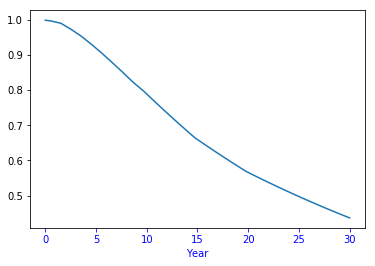

(array([-0.00258612, -0.00249125, -0.004823  , -0.00472376, -0.01224775,
        -0.0121287 , -0.01412773, -0.01399882, -0.01665935, -0.01651357,
        -0.01763396, -0.01747894, -0.01893035, -0.01876199, -0.01920616,
        -0.01903217, -0.02001872, -0.01983318, -0.01736235, -0.01720115,
        -0.01974324, -0.01955217, -0.0193611 , -0.01917003, -0.01897896,
        -0.01878788, -0.01859681, -0.01840574, -0.01821467, -0.0180236 ,
        -0.0142409 , -0.01409706, -0.01395322, -0.01380938, -0.01366554,
        -0.01352169, -0.01337785, -0.01323401, -0.01309017, -0.01294633,
        -0.01034166, -0.01023141, -0.01012115, -0.0100109 , -0.00990065,
        -0.0097904 , -0.00968015, -0.0095699 , -0.00945965, -0.00934939,
        -0.00923914, -0.00912889, -0.00901864, -0.00890839, -0.00879814,
        -0.00868789, -0.00857764, -0.00846738, -0.00835713, -0.00824688]),
 array([0.99817134, 0.99640975, 0.99299938, 0.98965918, 0.98099871,
        0.97242243, 0.96243262, 0.95253395, 0.94075401

In [87]:
delta = 1/2
n = 60

R = {} #=dict([(1,0.36), (2,20), ()])
maturity = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30])
swap_rate = np.array([0.36, 0.52, 0.93, 1.21, 1.46, 1.66, 1.84, 1.99, 2.13, 2.21,
                      2.63, 2.73, 2.71])
m = len(maturity)
for i in range(m):
    R[maturity[i]] = swap_rate[i]/100

p = np.array([1]*m)
C = np.zeros((m,n))
W = np.zeros((n,n))
M = np.zeros((n,n))
e1 = np.array([0]*n)

e1[0] = 1

for i in range(m):
    for j in range(n):
        j1 = j+1
        if (j1/2) < maturity[i]:
            C[i,j] = R[maturity[i]]/2
        elif (j1/2) == maturity[i]:
            C[i,j] = 1 + R[maturity[i]]/2
        else:
            C[i,j] = 0.0

W = np.diag([1/np.sqrt(delta)]*n)

M[0,0] = 1
for i in range(1, n):
    M[i,i-1] = -1
    M[i,i] = 1

W_1 = np.linalg.inv(W)
M_1 = np.linalg.inv(M)

A = C @ M_1 @ W_1
AA_T1 = np.linalg.inv(A @ A.T)

Delta_star = A.T @ AA_T1 @ (p.T - C @ M_1 @ e1.T)

# step 1: P(0,Ti) with pseudo-inverse method
d = M_1 @ (W_1 @ Delta_star + e1.T)

x = np.linspace(0, 30, 60)
plt.plot(x, d)
plt.xlabel('Year')
plt.show()

Delta_star, d

In [91]:
#step 2: k=?

k = (d[0]-d[-1])/(delta*sum(d[1:]))
k

0.027676714501101474

In [106]:
# step 3: calc the price of ATM cap

def myIntegral(b, nu, t0, t1):
    return nu**2/b**2 *(np.exp(-b*t0) - np.exp(-b*t1))**2 * (np.exp(2*b*t0)-1)/(2*b)

def Cap_hjm(b2, v2, k, delta, d):
    myAns = 0
    n = len(d)
    for i in range(1, n):
        t0 = i/2
        t1 = t0 + delta
        I = myIntegral(b2[0], v2[0], t0, t1) + myIntegral(b2[1], v2[1], t0, t1)
        #print(I)
        d1 = (np.log(d[i]/d[i-1]*(1+delta*k)) + 0.5*I)/np.sqrt(I)
        d2 = (np.log(d[i]/d[i-1]*(1+delta*k)) - 0.5*I)/np.sqrt(I)
        cplt_i = d[i-1]*norm.cdf(-d2,0,1)-(1+delta*k)*d[i]*(norm.cdf(-d1,0,1))
        #print(d[i])
        #print(cplt_i)
        myAns = myAns + cplt_i 
    return myAns

v2 = (0.01, 0.02)
b2 = (0.3, 0.5)

cp = Cap_hjm(b2, v2, k, delta, d)
'cp = %.2f' % (cp*100)

'cp = 18.39'

In [113]:
#step 4: P(0,Ti) => F(0,T(i-1), T(i))

F = np.array([0.0]*n)

for i in range(1, n):
    F[i] = (1/delta)*(d[i-1]/d[i]-1)
d,F,delta

(array([0.99817134, 0.99640975, 0.99299938, 0.98965918, 0.98099871,
        0.97242243, 0.96243262, 0.95253395, 0.94075401, 0.92907715,
        0.91660806, 0.90424858, 0.89086281, 0.87759608, 0.86401527,
        0.8505575 , 0.83640213, 0.82237795, 0.81010092, 0.79793787,
        0.78397729, 0.77015182, 0.75646145, 0.7429062 , 0.72948605,
        0.71620101, 0.70305108, 0.69003625, 0.67715654, 0.66441193,
        0.65434209, 0.64437396, 0.63450755, 0.62474284, 0.61507985,
        0.60551857, 0.596059  , 0.58670114, 0.57744499, 0.56829055,
        0.5609779 , 0.5537432 , 0.54658646, 0.53950768, 0.53250687,
        0.52558401, 0.51873911, 0.51197217, 0.50528319, 0.49867217,
        0.49213911, 0.48568401, 0.47930686, 0.47300768, 0.46678646,
        0.46064319, 0.45457789, 0.44859055, 0.44268116, 0.43684973]),
 array([0.        , 0.00353586, 0.00686883, 0.00675021, 0.01765643,
        0.01763901, 0.0207595 , 0.02078385, 0.02504362, 0.02513647,
        0.02720703, 0.02733646, 0.03005126, 0.

In [114]:
#step 5: solve for black vol

def BlackCap(sig, k, fwds, delta, d):
    myAns = 0
    n = len(d)
    for i in range(1, n):
        ti = i/2
        d1 = (np.log(fwds[i]/k) + 0.5*(sig**2)*ti)/(sig*np.sqrt(ti))
        d2 = d1 - sig*np.sqrt(ti)
        cplt_i = delta*d[i]*(fwds[i]*norm.cdf(d1,0,1) - k*norm.cdf(d2,0,1))
        myAns = myAns + cplt_i
    return myAns

BCap = lambda iv: BlackCap(iv, k, F, delta, d) - cp
impVol = bisect(BCap, 0.005, 0.25)

impVol

0.2185436423767169

In [116]:
#step 6: solve for norm vol

def BachelierCap(sig, k, fwds, delta, d):
    myAns = 0
    n = len(d)
    for i in range(1, n):
        ti = i/2
        Di = (fwds[i] - k)/(sig*np.sqrt(ti))
        cplt_i = delta*d[i]*(sig*np.sqrt(ti))*(Di*norm.cdf(Di,0,1) + norm.pdf(Di,0,1))
        myAns = myAns + cplt_i
    return myAns

BachCap = lambda iv: BachelierCap(iv, k, F, delta, d) - cp
impVol = bisect(BachCap, 1e-8, 0.25)

impVol*1e4

60.733695918380235